In [1]:
import pandas as pd,warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/heart failure.csv');df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='anaemia', ylabel='count'>

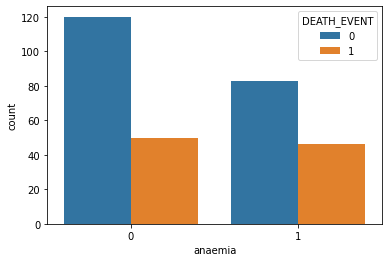

In [15]:
sns.countplot(x='anaemia',data=df,hue='DEATH_EVENT')

<AxesSubplot:xlabel='sex', ylabel='count'>

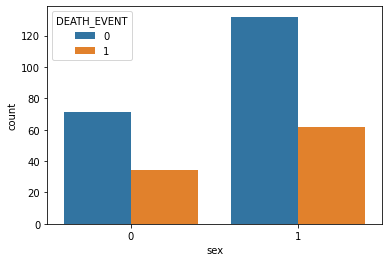

In [16]:
sns.countplot(x='sex',data=df,hue='DEATH_EVENT')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

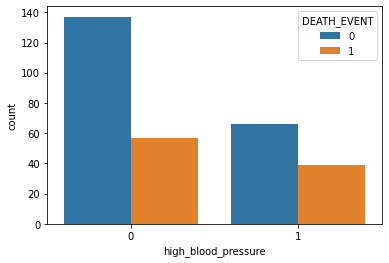

In [17]:
sns.countplot(x='high_blood_pressure',data=df,hue='DEATH_EVENT') 

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

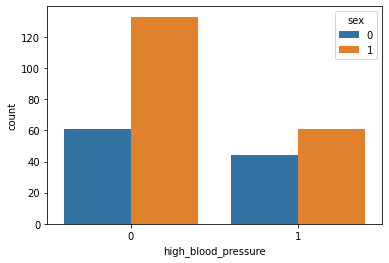

In [18]:
sns.countplot(x='high_blood_pressure',data=df,hue='sex') 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = df.drop('DEATH_EVENT',axis=1)
y = df.DEATH_EVENT

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.70,random_state=1)

# DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt = DecisionTreeClassifier().fit(xtrain,ytrain)

In [25]:
dt_pred = dt.predict(xtest)

In [26]:
dt.score(xtest,ytest)

0.8222222222222222

In [27]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve

In [28]:
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        64
           1       0.73      0.62      0.67        26

    accuracy                           0.82        90
   macro avg       0.79      0.76      0.77        90
weighted avg       0.82      0.82      0.82        90



<AxesSubplot:>

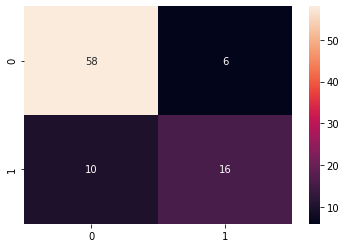

In [36]:
sns.heatmap(confusion_matrix(ytest,dt_pred),annot=True)

In [37]:
accuracy_score(ytest,dt_pred)

0.8222222222222222

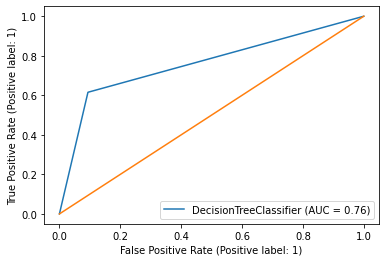

In [41]:
import matplotlib.pyplot as plt
plot_roc_curve(dt,xtest,ytest)
plt.plot([0,1])

# RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_clf = RandomForestClassifier(n_estimators=10).fit(xtrain,ytrain)

In [45]:
rf_clf.score(xtest,ytest)

0.8444444444444444

In [47]:
rf_pred = rf_clf.predict(xtest)

In [50]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        64
           1       0.83      0.58      0.68        26

    accuracy                           0.84        90
   macro avg       0.84      0.77      0.79        90
weighted avg       0.84      0.84      0.83        90



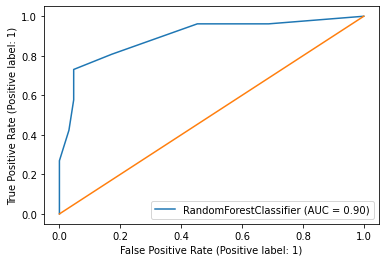

In [49]:
plot_roc_curve(rf_clf,xtest,ytest)
plt.plot([0,1])

# HyperPerameter Tuning/Optimization

## RamdomizedSearchCV

In [52]:
import numpy as np

In [66]:
n_estimators = [int(x) for x in np.linspace(50,200,15)]
max_features = ['auto','sqrt','log2']
max_depth = [2,3,4,5,6,7,8,9,10,11,12]
min_samples_split = [2,3,4,5,6,7,8,9,10,11,12]
min_samples_leaf = [2,3,4,5,6,7,8,9,10,11,12]
grids = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'criterion':['entropy','gini']   
}

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
rmcv = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=grids,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)
rmcv.fit(xtrain,ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11,
                                                              12],
                                        'n_estimators': [50, 60, 71, 82, 92,
                                                         103, 114, 125, 135,
   

In [69]:
rmcv.best_params_

{'n_estimators': 135,
 'min_samples_split': 9,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'gini'}

In [70]:
rmcv.best_estimator_.score(xtest,ytest)

0.9

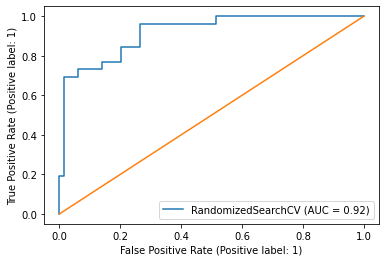

In [90]:
plot_roc_curve(rmcv,xtest,ytest)
plt.plot([0,1])

## GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = {
    'criterion':[rmcv.best_params_['criterion']],
    'max_depth':[rmcv.best_params_['max_depth']],
    'max_features':[rmcv.best_params_['max_features']],
    'min_samples_leaf':[rmcv.best_params_['min_samples_leaf'],
                       rmcv.best_params_['min_samples_leaf']+2,
                       rmcv.best_params_['min_samples_leaf']+4],
    'min_samples_split':[rmcv.best_params_['min_samples_split']-2,
                        rmcv.best_params_['min_samples_split']-1,
                        rmcv.best_params_['min_samples_split'],
                        rmcv.best_params_['min_samples_split']+1,
                        rmcv.best_params_['min_samples_split']+2],
    'n_estimators':[rmcv.best_params_['n_estimators']-135,
                   rmcv.best_params_['n_estimators']-35,
                   rmcv.best_params_['n_estimators'],
                   rmcv.best_params_['n_estimators']+35,
                   rmcv.best_params_['n_estimators']+100]
}

In [75]:
%%time
gdcv = GridSearchCV(RandomForestClassifier(),param_grid,cv=3,verbose=2,n_jobs=-1,scoring='accuracy')
gdcv.fit(xtrain,ytrain)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Wall time: 6.55 s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [9],
                         'max_features': ['log2'],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [7, 8, 9, 10, 11],
                         'n_estimators': [0, 100, 135, 170, 235]},
             scoring='accuracy', verbose=2)

In [76]:
gdcv.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 170}

In [78]:
gdcv.best_estimator_.score(xtest,ytest)

0.9

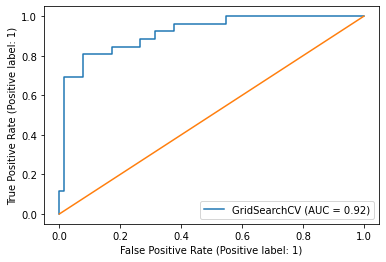

In [91]:
plot_roc_curve(gdcv,xtest,ytest)
plt.plot([0,1])

# Boosting

In [79]:
from xgboost import XGBClassifier

In [85]:
xgb = XGBClassifier(eval_metric='logloss').fit(xtrain,ytrain)

In [86]:
xgb.score(xtest,ytest)

0.9

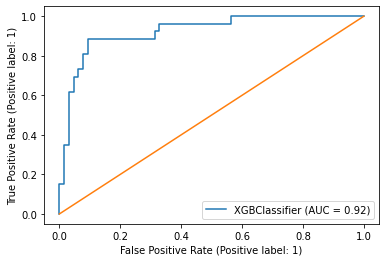

In [92]:
plot_roc_curve(xgb,xtest,ytest)
plt.plot([0,1])

In [87]:
from sklearn.ensemble import AdaBoostClassifier

In [88]:
ada = AdaBoostClassifier().fit(xtrain,ytrain)

In [89]:
ada.score(xtest,ytest)

0.8222222222222222